In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
import seaborn as sns
from IPython.display import Image
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import  LassoCV,Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor


In [36]:
features=pd.read_csv('Features data set.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [37]:
features.shape

(8190, 12)

In [38]:
stores=pd.read_csv('stores data-set.csv')
sales=pd.read_csv('sales data-set.csv')

In [39]:
stores.shape

(45, 3)

In [40]:
sales.shape

(421570, 5)

In [41]:
features['Date'] = pd.to_datetime(features['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])


In [42]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [43]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [44]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [45]:
print(features.shape)
print(sales.shape)
print(stores.shape)

(8190, 12)
(421570, 5)
(45, 3)


In [46]:
df=pd.merge(sales,features, on=['Store','Date', 'IsHoliday'], how='inner')
df=pd.merge(df,stores, on=['Store'], how='inner')
df.isnull().sum()/len(df)*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

In [47]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 51.9+ MB


In [49]:
le=LabelEncoder()
df['IsHoliday']=le.fit_transform(df['IsHoliday'])
df['Type']=le.fit_transform(df['Type'])
df['Temperature'] = (df['Temperature']- 32) * 5./9.
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,0,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
1,1,2,2010-05-02,50605.27,0,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
2,1,3,2010-05-02,13740.12,0,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
3,1,4,2010-05-02,39954.04,0,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
4,1,5,2010-05-02,32229.38,0,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,14.916667,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221
421566,45,94,2012-10-26,5203.31,0,14.916667,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221
421567,45,95,2012-10-26,56017.47,0,14.916667,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221
421568,45,97,2012-10-26,6817.48,0,14.916667,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221


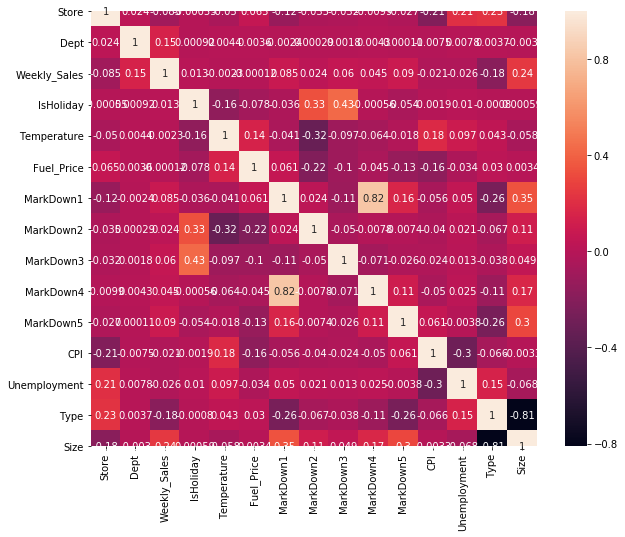

In [50]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [51]:
df=df.fillna(0)
df['Temperature'] = (df['Temperature']- 32) * 5./9.
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
1,1,2,2010-05-02,50605.27,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
2,1,3,2010-05-02,13740.12,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
3,1,4,2010-05-02,39954.04,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
4,1,5,2010-05-02,32229.38,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,-9.490741,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221
421566,45,94,2012-10-26,5203.31,0,-9.490741,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221
421567,45,95,2012-10-26,56017.47,0,-9.490741,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221
421568,45,97,2012-10-26,6817.48,0,-9.490741,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,1,118221


In [52]:
df.to_csv('df.csv')

In [53]:
df.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.059844,-0.033829,-0.020331,-0.042724,-0.012452,-0.211088,0.208552,0.226410,-0.182881
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,0.001494,0.000587,0.001475,0.001937,0.002668,-0.007477,0.007837,0.003708,-0.002966
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.047172,0.020716,0.038562,0.037467,0.050465,-0.020921,-0.025864,-0.182242,0.243828
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.003521,0.207604,0.266471,0.011565,-0.015235,-0.001944,0.010460,-0.000798,0.000593
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.026415,-0.179672,-0.056026,-0.050281,-0.014752,0.182112,0.096730,0.042981,-0.058313
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.297056,0.029153,0.018615,0.166622,0.215420,-0.164210,-0.033853,0.029687,0.003361
MarkDown1,-0.059844,0.001494,0.047172,-0.003521,-0.026415,0.297056,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,-0.105168,-0.126345,0.169788
MarkDown2,-0.033829,0.000587,0.020716,0.207604,-0.179672,0.029153,0.174868,1.000000,-0.006080,0.113250,0.131735,-0.003554,-0.041427,-0.055318,0.078372
MarkDown3,-0.020331,0.001475,0.038562,0.266471,-0.056026,0.018615,-0.014411,-0.006080,1.000000,-0.012020,0.042471,-0.005839,-0.018078,-0.024013,0.033641
MarkDown4,-0.042724,0.001937,0.037467,0.011565,-0.050281,0.166622,0.838904,0.113250,-0.012020,1.000000,0.303370,-0.002047,-0.076513,-0.089770,0.127334


In [54]:
df.shape

(421570, 16)

In [55]:
df.isnull().sum() 

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [56]:
df['Weekly_Sales']=df['Weekly_Sales'].abs()

In [57]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,0,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,2,2010-05-02,50605.27,0,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
2,1,3,2010-05-02,13740.12,0,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
3,1,4,2010-05-02,39954.04,0,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
4,1,5,2010-05-02,32229.38,0,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null int32
Size            421570 non-null int64
dtypes: datetime64[ns](1), float64(10), int32(1), int64(4)
memory usage: 53.1 MB


In [59]:
df.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.676377,0.070358,-9.108007,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.589912,136727.915739
std,12.785297,30.492054,22710.889199,0.255750,5.693806,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,1.000000,1.000000,0.000000,0.000000,-28.290123,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000
25%,11.000000,18.000000,2079.757500,0.000000,-13.246914,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000
50%,22.000000,37.000000,7612.030000,0.000000,-8.490741,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000
75%,33.000000,74.000000,20205.852500,0.000000,-4.728395,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,1.000000,202505.000000
max,45.000000,99.000000,693099.360000,1.000000,3.253086,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000


In [60]:
df = df.reindex(
    columns=['Date', 'Store', 'Dept','Type', 'Size', 'MarkDown1',
             'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5',
             'CPI','Temperature','Fuel_Price','Unemployment',
             'IsHoliday', 'Weekly_Sales'])

In [61]:
df.head()

,Date,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales
0,2010-05-02,1,1,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,24924.50
1,2010-05-02,1,2,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,50605.27
2,2010-05-02,1,3,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,13740.12
3,2010-05-02,1,4,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,39954.04
4,2010-05-02,1,5,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,32229.38


In [62]:
df.corr()

,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales
Store,1.000000,0.024004,0.226410,-0.182881,-0.059844,-0.033829,-0.020331,-0.042724,-0.012452,-0.211088,-0.050097,0.065290,0.208552,-0.000548,-0.085198
Dept,0.024004,1.000000,0.003708,-0.002966,0.001494,0.000587,0.001475,0.001937,0.002668,-0.007477,0.004437,0.003572,0.007837,0.000916,0.148035
Type,0.226410,0.003708,1.000000,-0.811593,-0.126345,-0.055318,-0.024013,-0.089770,-0.130125,-0.065812,0.042981,0.029687,0.148720,-0.000798,-0.182245
Size,-0.182881,-0.002966,-0.811593,1.000000,0.169788,0.078372,0.033641,0.127334,0.153011,-0.003314,-0.058313,0.003361,-0.068238,0.000593,0.243833
MarkDown1,-0.059844,0.001494,-0.126345,0.169788,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,-0.026415,0.297056,-0.105168,-0.003521,0.047171
MarkDown2,-0.033829,0.000587,-0.055318,0.078372,0.174868,1.000000,-0.006080,0.113250,0.131735,-0.003554,-0.179672,0.029153,-0.041427,0.207604,0.020720
MarkDown3,-0.020331,0.001475,-0.024013,0.033641,-0.014411,-0.006080,1.000000,-0.012020,0.042471,-0.005839,-0.056026,0.018615,-0.018078,0.266471,0.038561
MarkDown4,-0.042724,0.001937,-0.089770,0.127334,0.838904,0.113250,-0.012020,1.000000,0.303370,-0.002047,-0.050281,0.166622,-0.076513,0.011565,0.037467
MarkDown5,-0.012452,0.002668,-0.130125,0.153011,0.415050,0.131735,0.042471,0.303370,1.000000,0.067906,-0.014752,0.215420,-0.120406,-0.015235,0.050464
CPI,-0.211088,-0.007477,-0.065812,-0.003314,0.010915,-0.003554,-0.005839,-0.002047,0.067906,1.000000,0.182112,-0.164210,-0.299953,-0.001944,-0.020924


# Move Towards univariate analysis

In [26]:
import seaborn as sns
from matplotlib import pyplot as plt

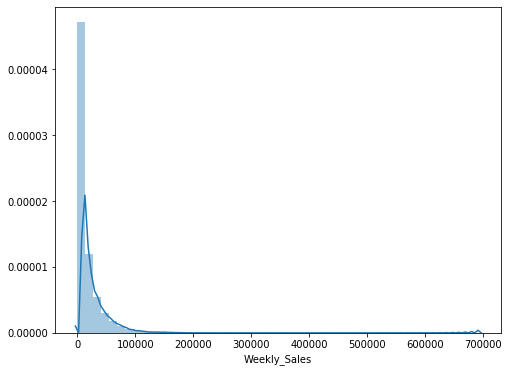

In [27]:
plt.figure(figsize=(8,6))
sns.distplot(df['Weekly_Sales'])

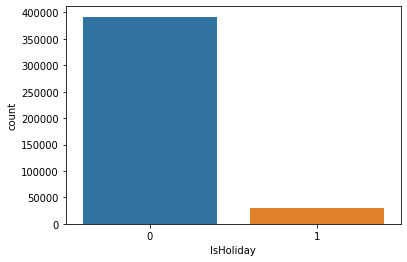

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(df['IsHoliday'])

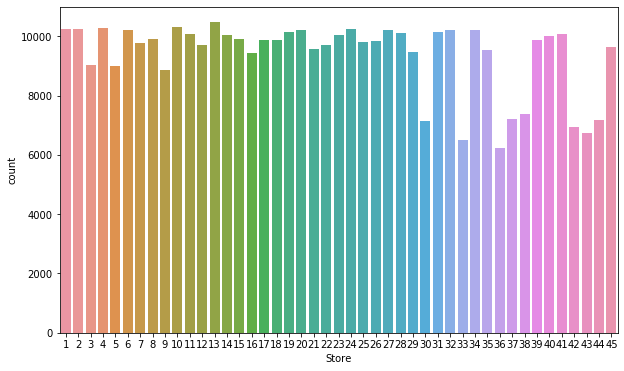

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(df['Store'])

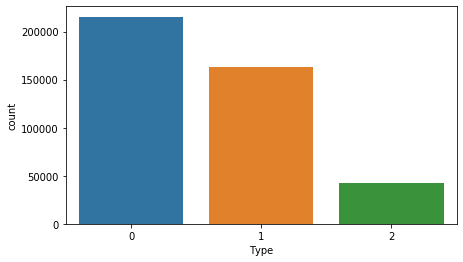

In [30]:
plt.figure(figsize=(7,4))
sns.countplot(df['Type'])

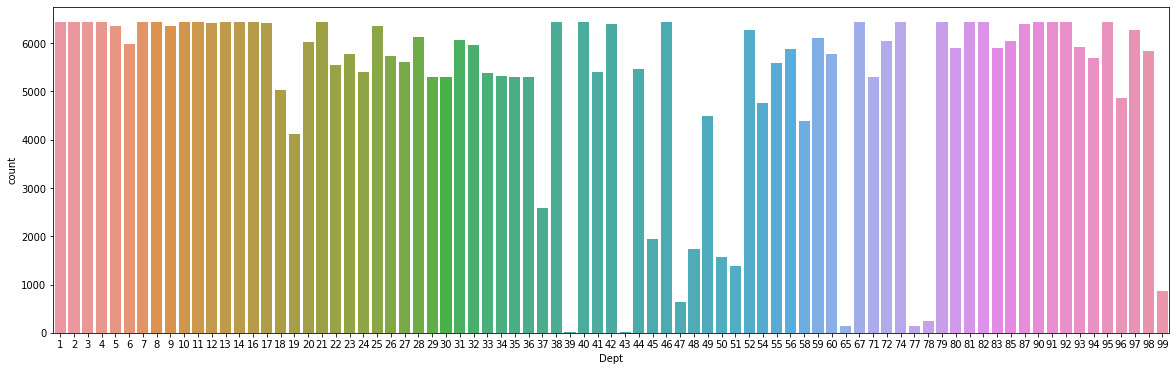

In [31]:
plt.figure(figsize=(20,6))
sns.countplot(df['Dept'])

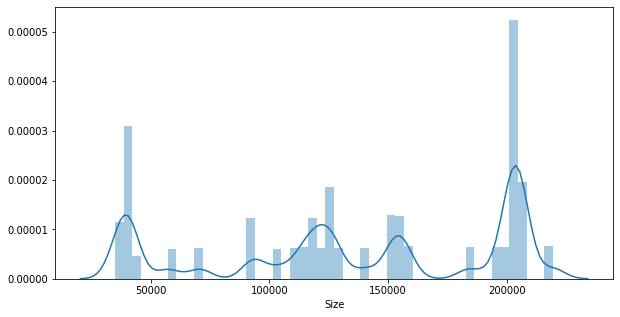

In [32]:
plt.figure(figsize=(10,5))
sns.distplot(df['Size'])

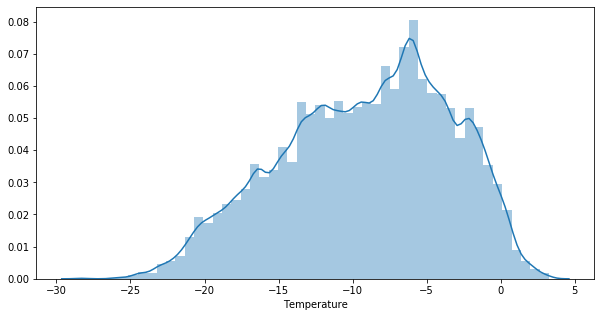

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(df['Temperature'])

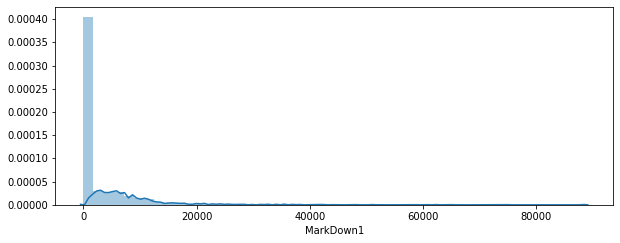

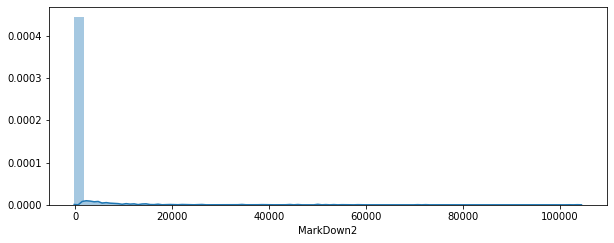

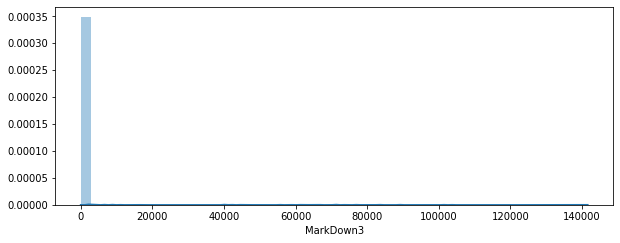

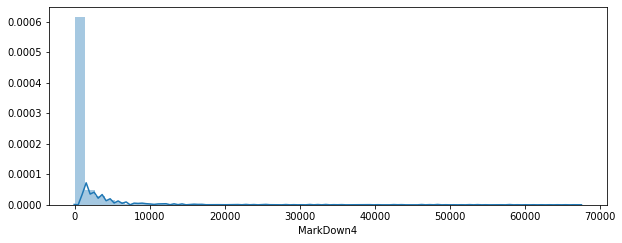

In [34]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
a = sns.distplot(df['MarkDown1'])
plt.show(a)
plt.figure(figsize=(10,8))
plt.subplot(2,1,2)
b = sns.distplot(df['MarkDown2'])
plt.show(b)
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
c = sns.distplot(df['MarkDown3'])
plt.show(c)
plt.figure(figsize=(10,8))
plt.subplot(2,1,2)
d = sns.distplot(df['MarkDown4'])
plt.show(d)

# Move Towards Bivariate Analysis

# Weekly_Sales vs Store

In [35]:
cd\Users\yemul\OneDrive\Desktop\Retail_Data_Analytics\Bivariaent analysis

C:\Users\yemul\OneDrive\Desktop\Retail_Data_Analytics\Bivariaent analysis


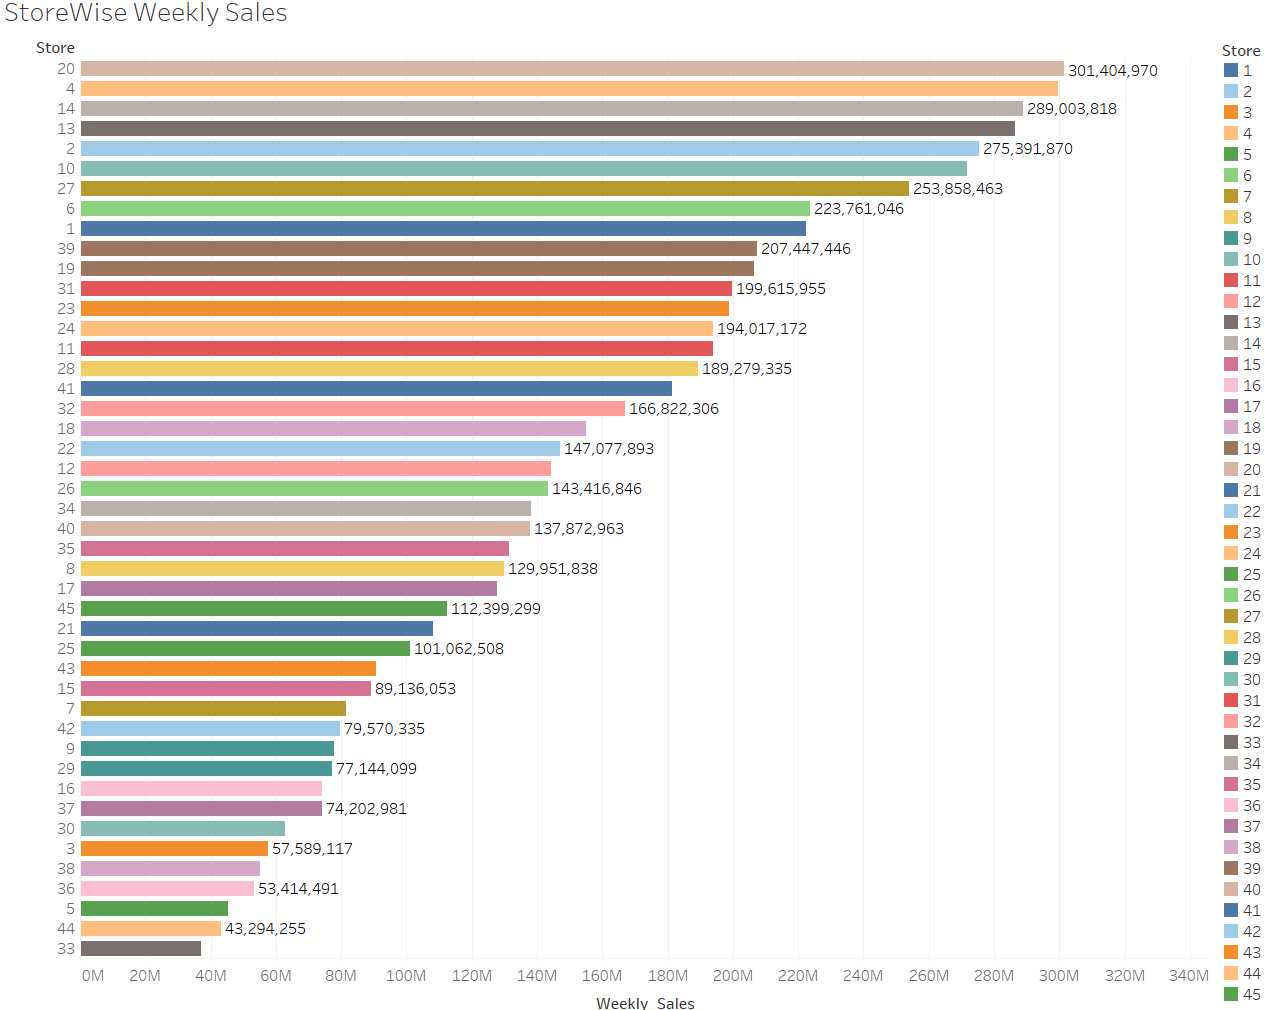

In [36]:
from IPython.display import Image
Image(filename='Weekly_Sales vs Store.png') 

# Weekly_Sales vs Store

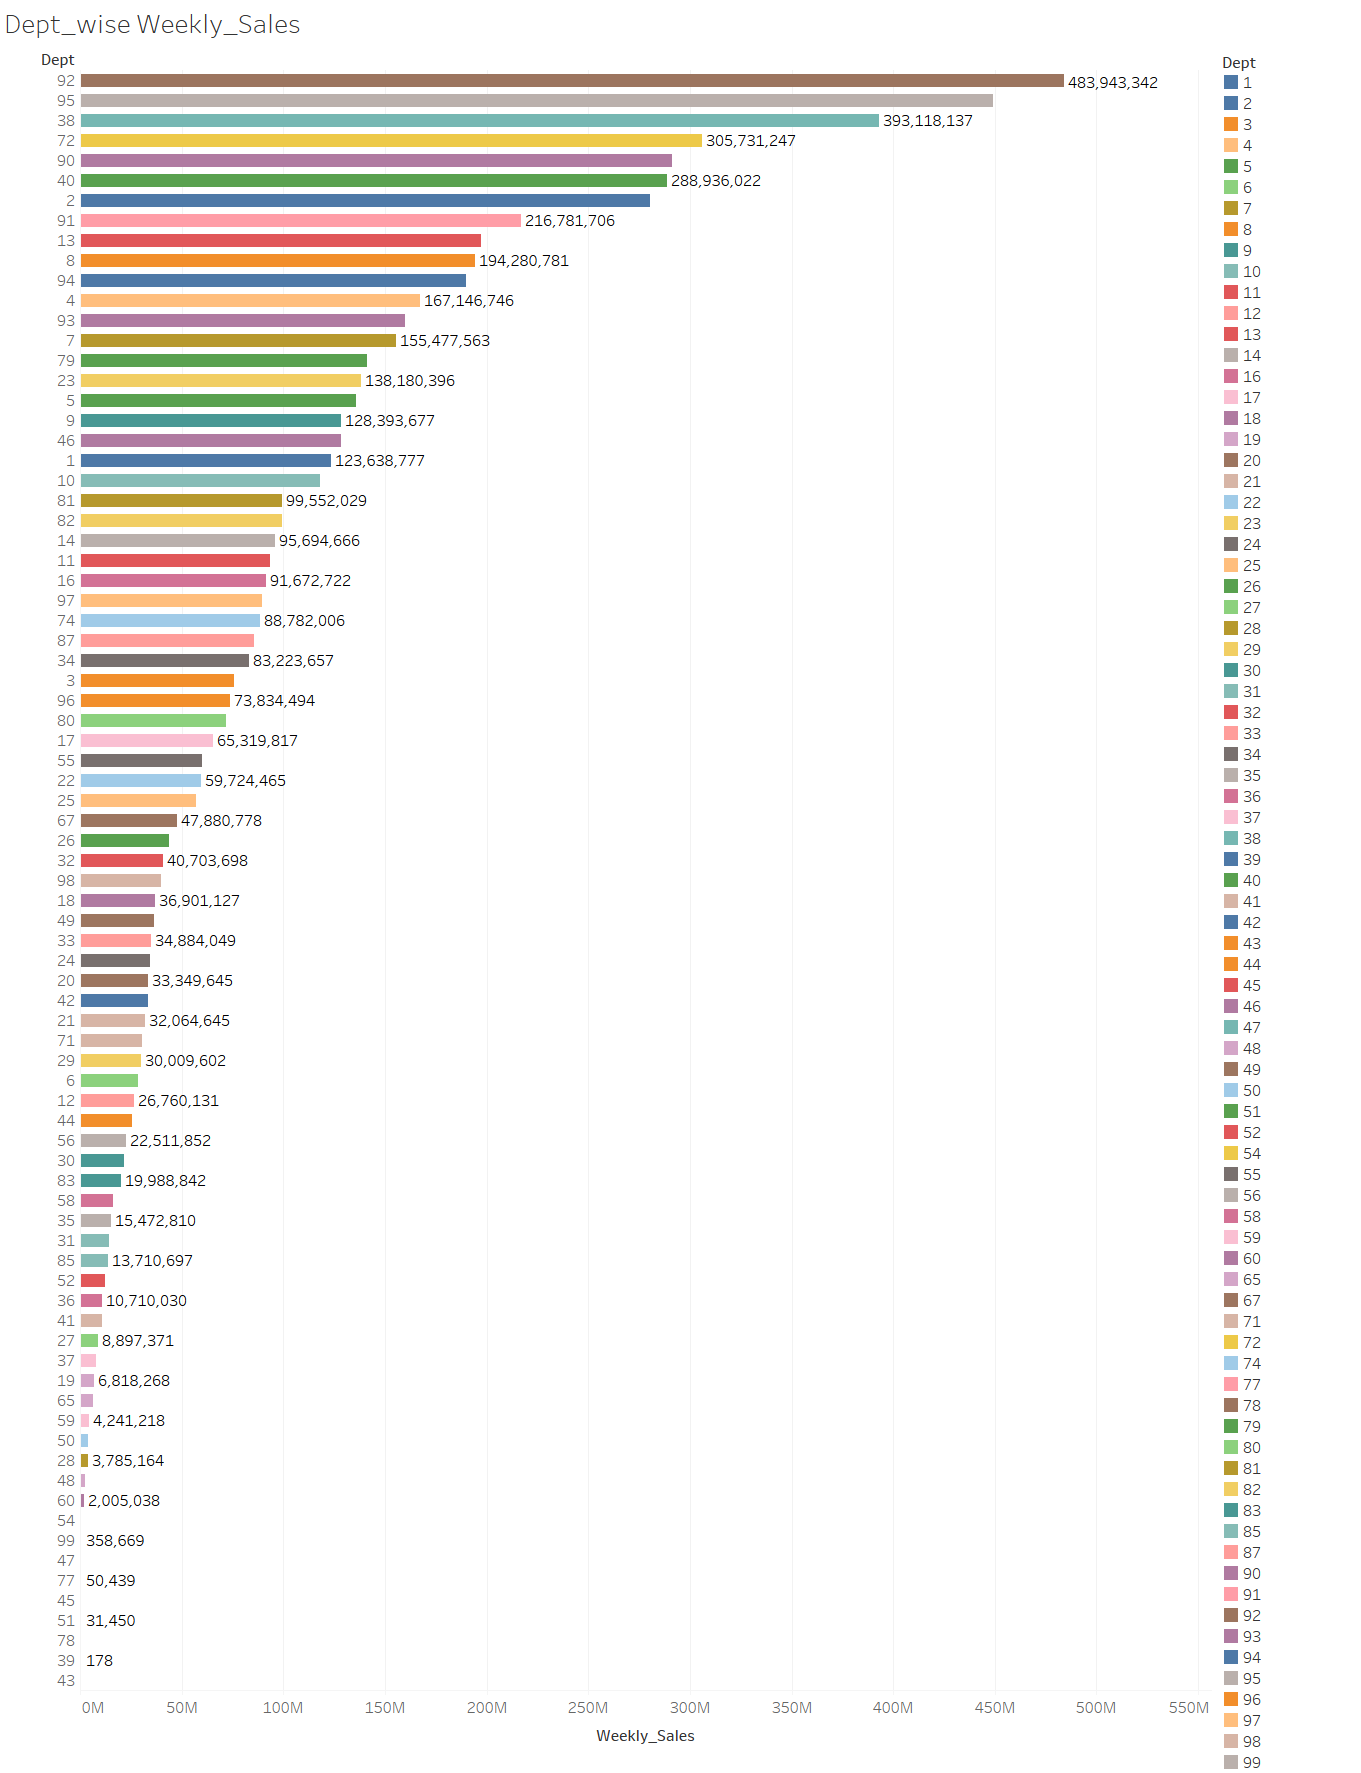

In [37]:
Image(filename='Dept_wise Weekly_Sales.png') 

# Dept-Low Weekly_Sales

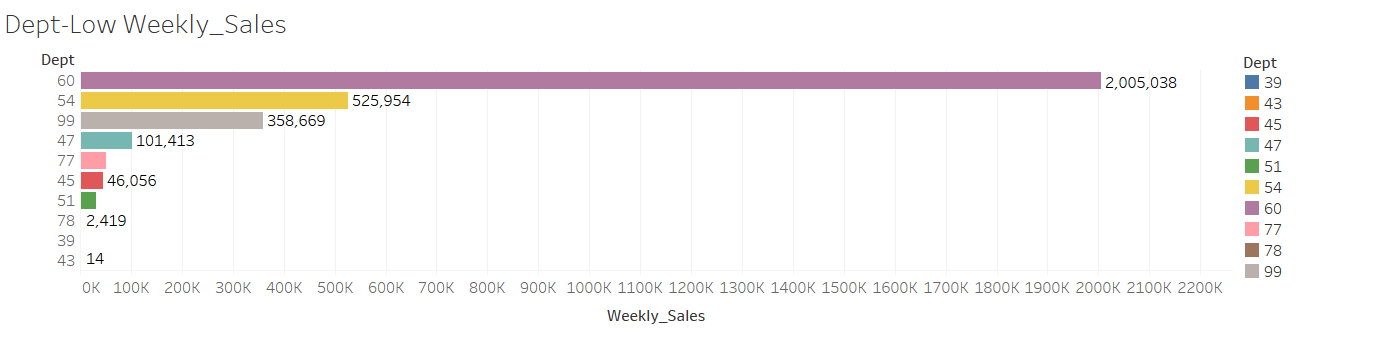

In [38]:
Image(filename='Dept-Low Weekly_Sales.png') 

# Temperature Vs Weekly_Sales 

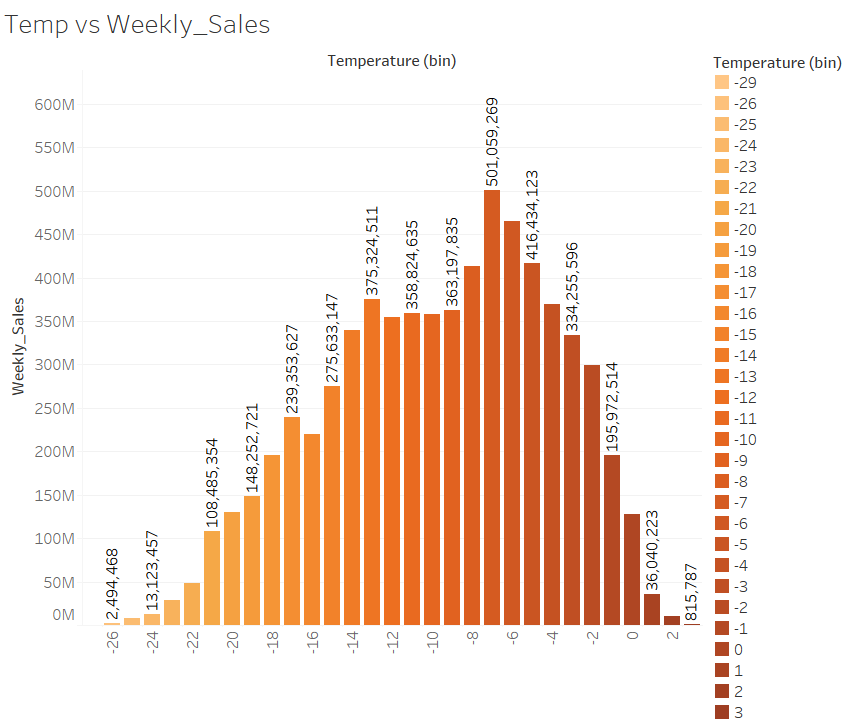

In [39]:
Image(filename='Temp vs Weekly_Sales.png') 

# Store,Size,Weekly_Sales

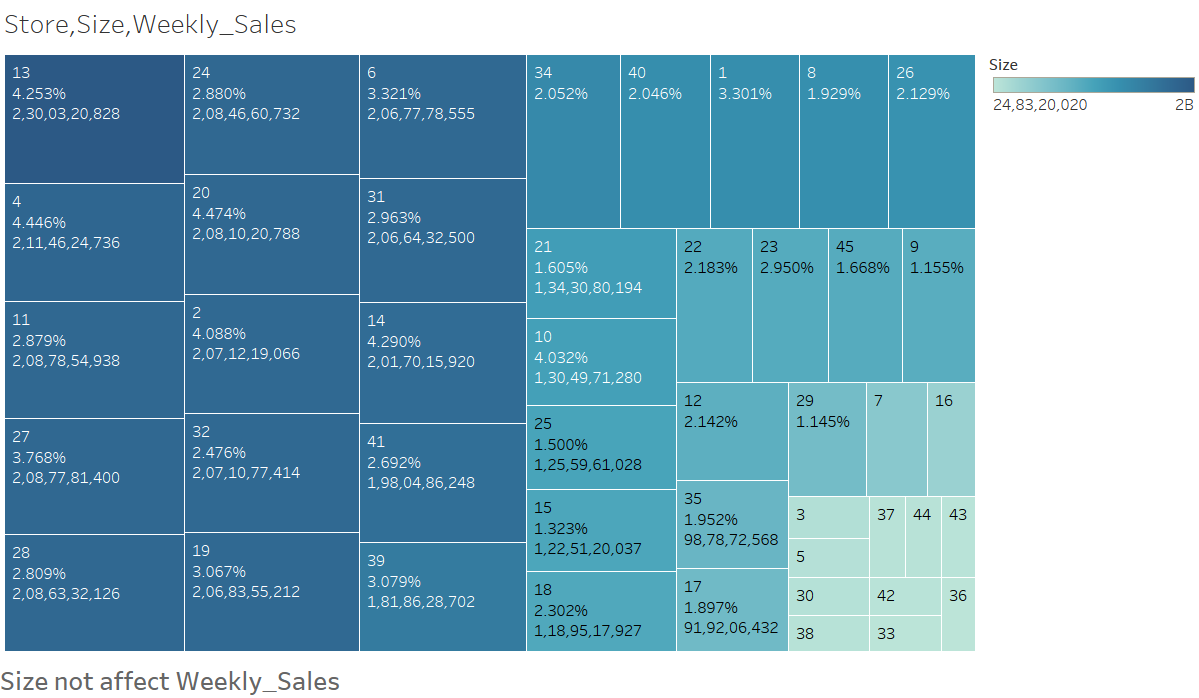

In [40]:
Image(filename='Store,Size,Weekly_Sales.png')

# MarkDown1 Vs Weekly_Sales

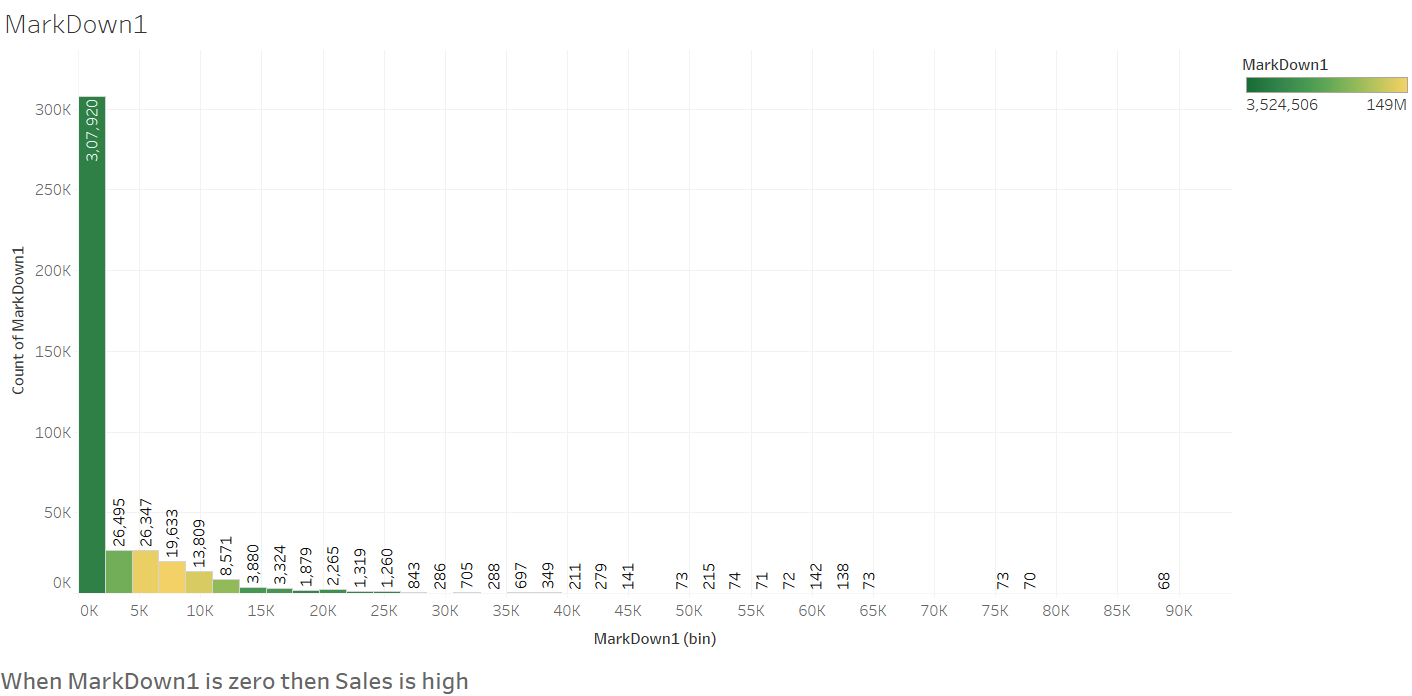

In [41]:
Image(filename='MarkDown1.png')

# MarkDown2 Vs Weekly_Sales

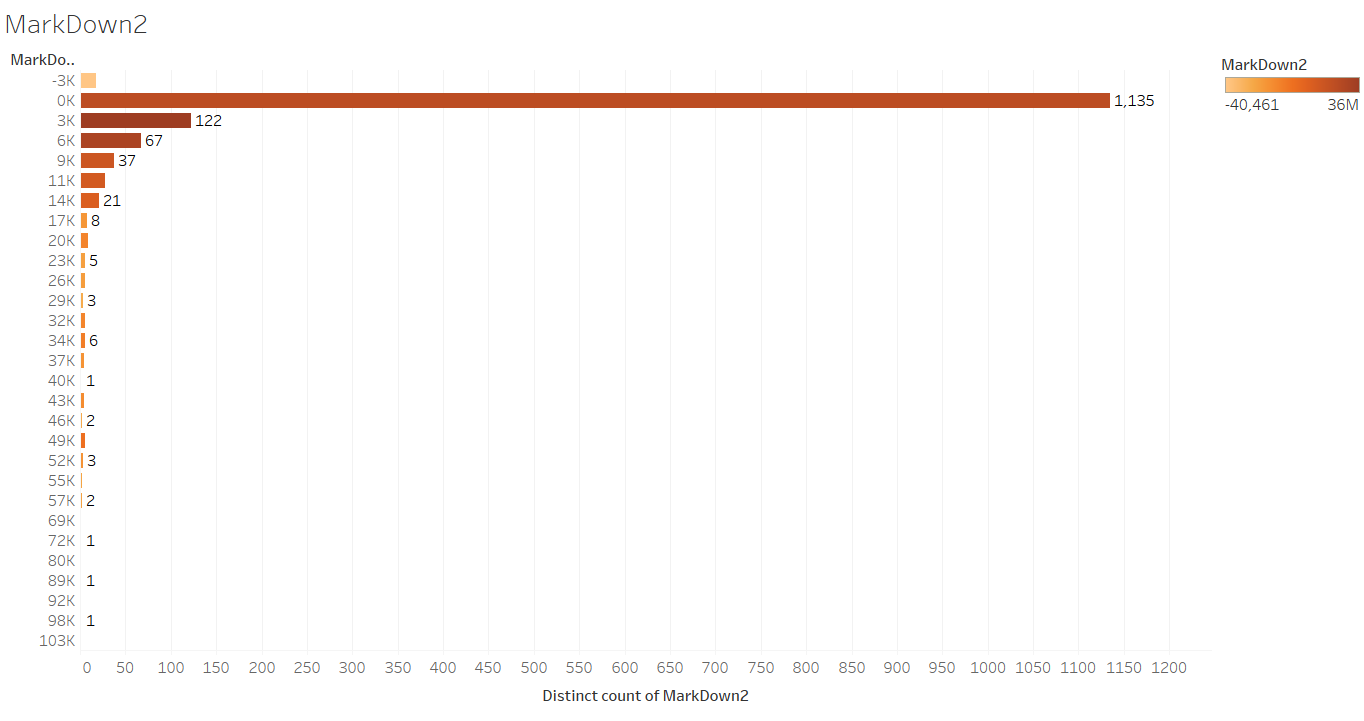

In [42]:
Image(filename='MarkDown2.png')

# MarkDown3 Vs Weekly_Sales

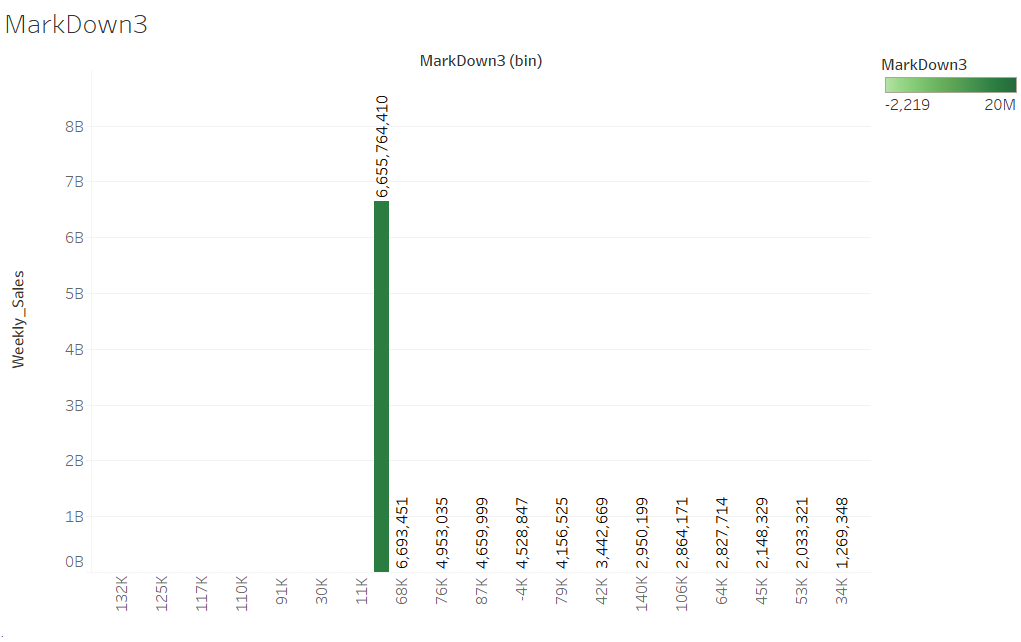

In [43]:
Image(filename='MarkDown3.png')

# MarkDown4 Vs Weekly_Sales

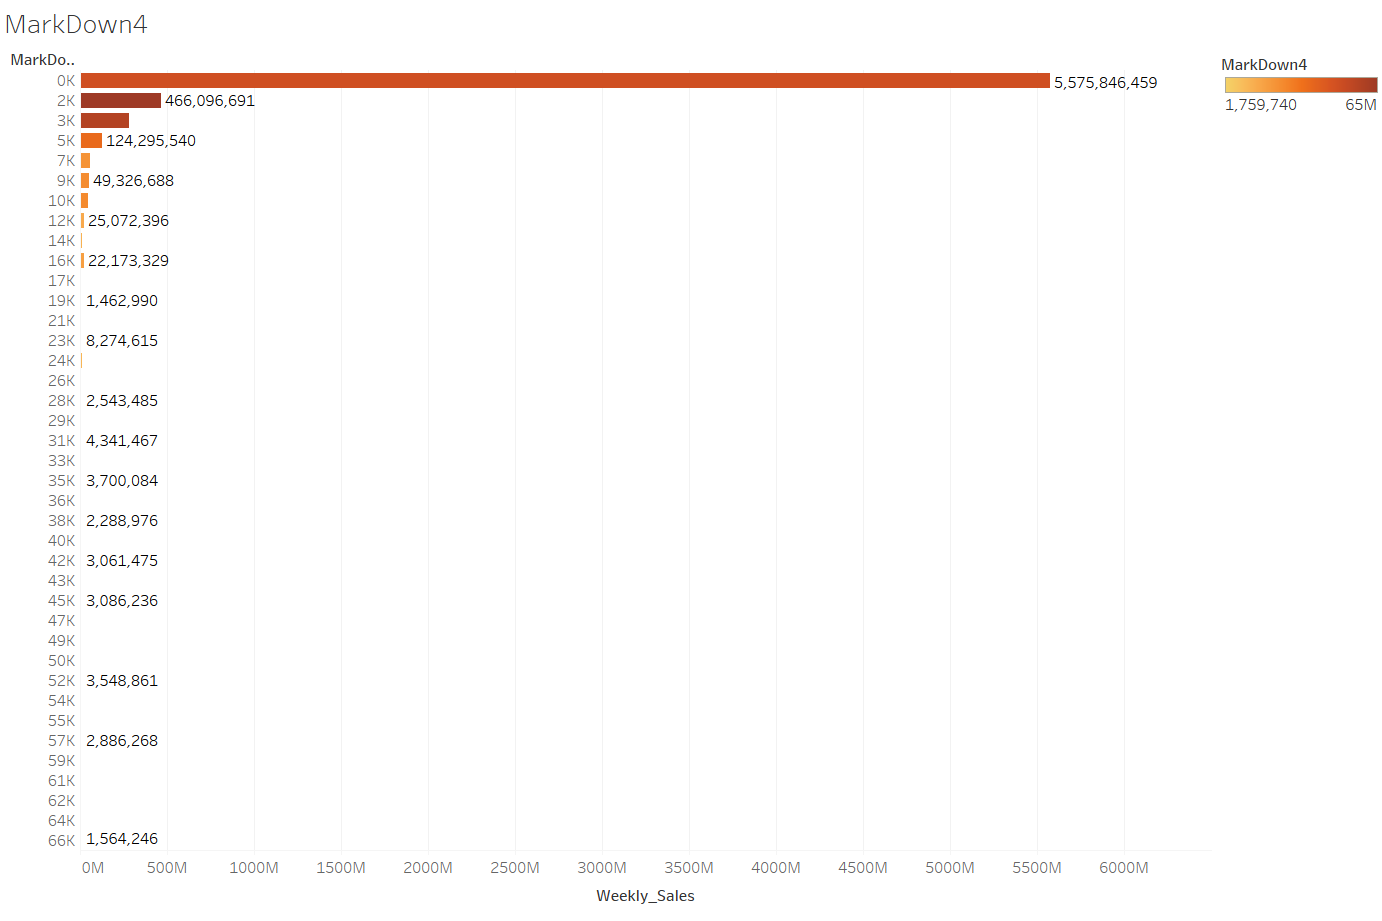

In [44]:
Image(filename='MarkDown4.png')

# MarkDown5 Vs Weekly_Sales

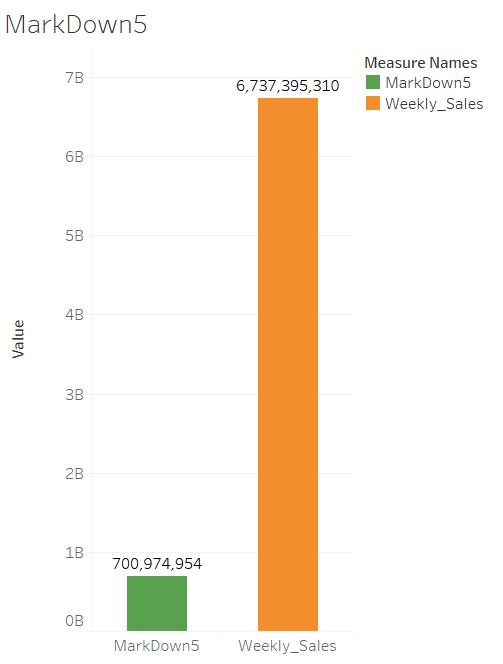

In [45]:
Image(filename='MarkDown5.png')

# CPI vs Weekly_Sales

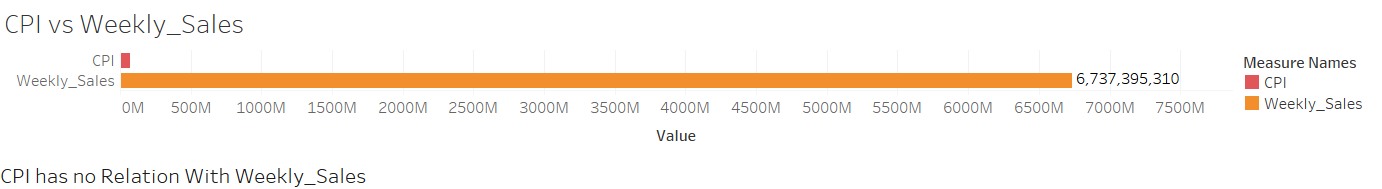

In [46]:
Image(filename='CPI vs Weekly_Sales.png')

# Type vs Weekly_Sales

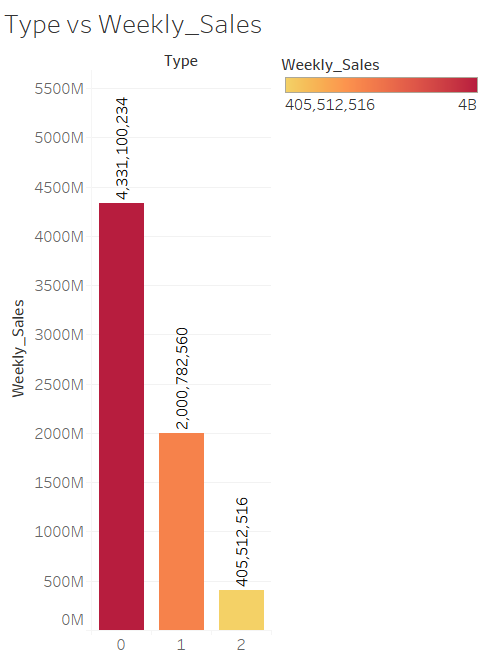

In [47]:
Image(filename='Type vs Weekly_Sales.png')

# Fuel_Price vs Weekly_Sales

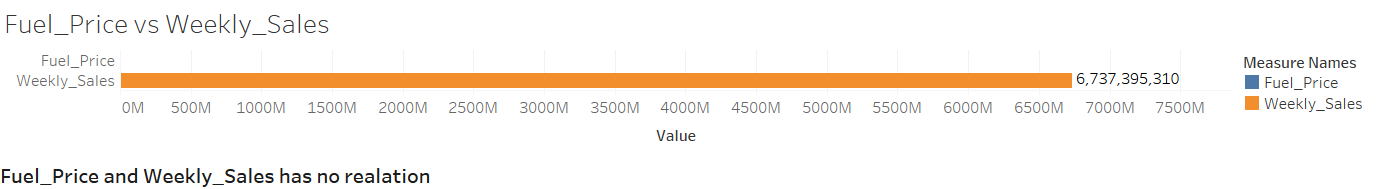

In [48]:
Image(filename='Fuel_Price vs Weekly_Sales .png')

# Date vs Weekly_Sales

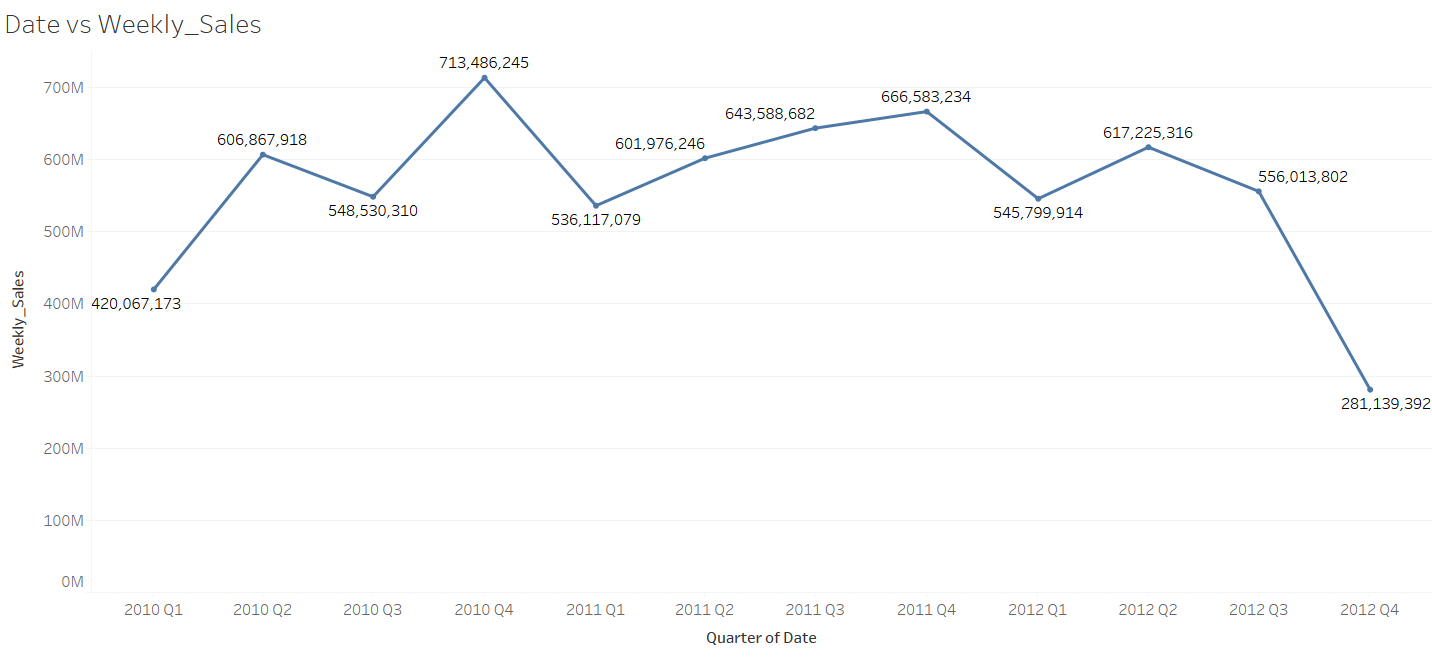

In [49]:
Image(filename='Date vs Weekly_Sales.png')

# IsHoliday vs Weekly_Sales

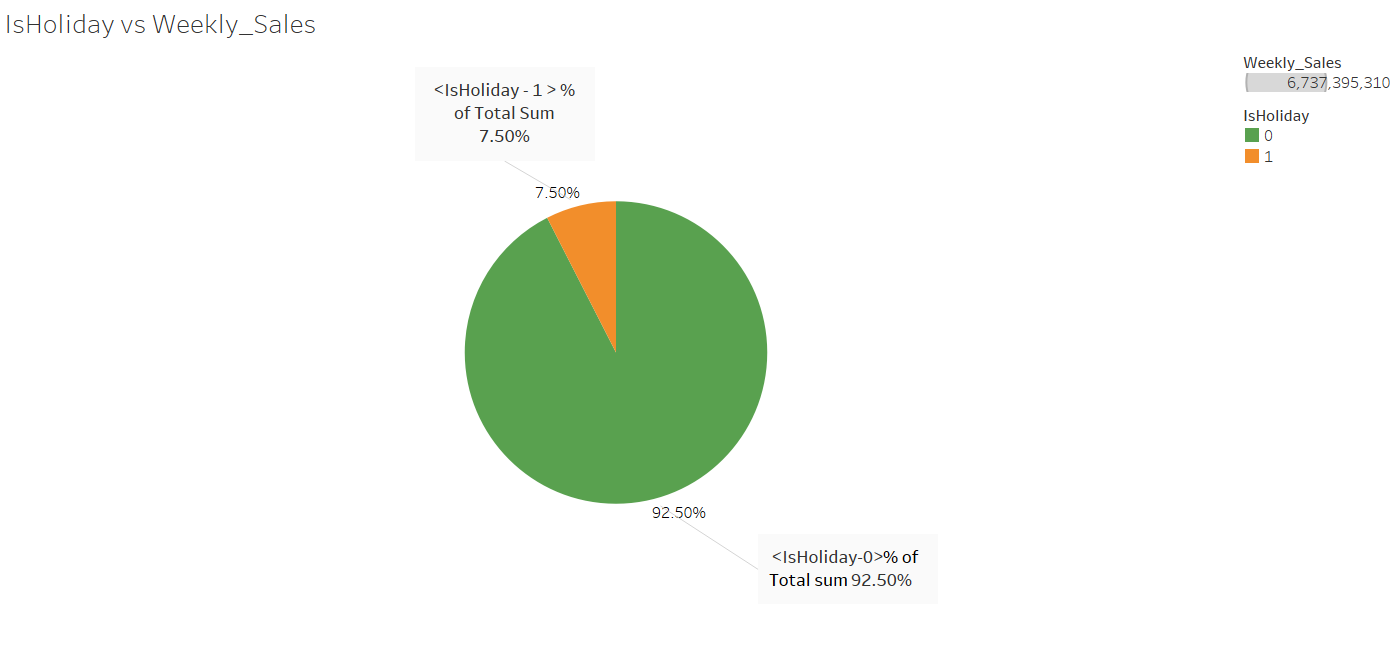

In [50]:
Image(filename='IsHoliday vs Weekly_Sales.png')

# IsHoliday vs Weekly_Sales

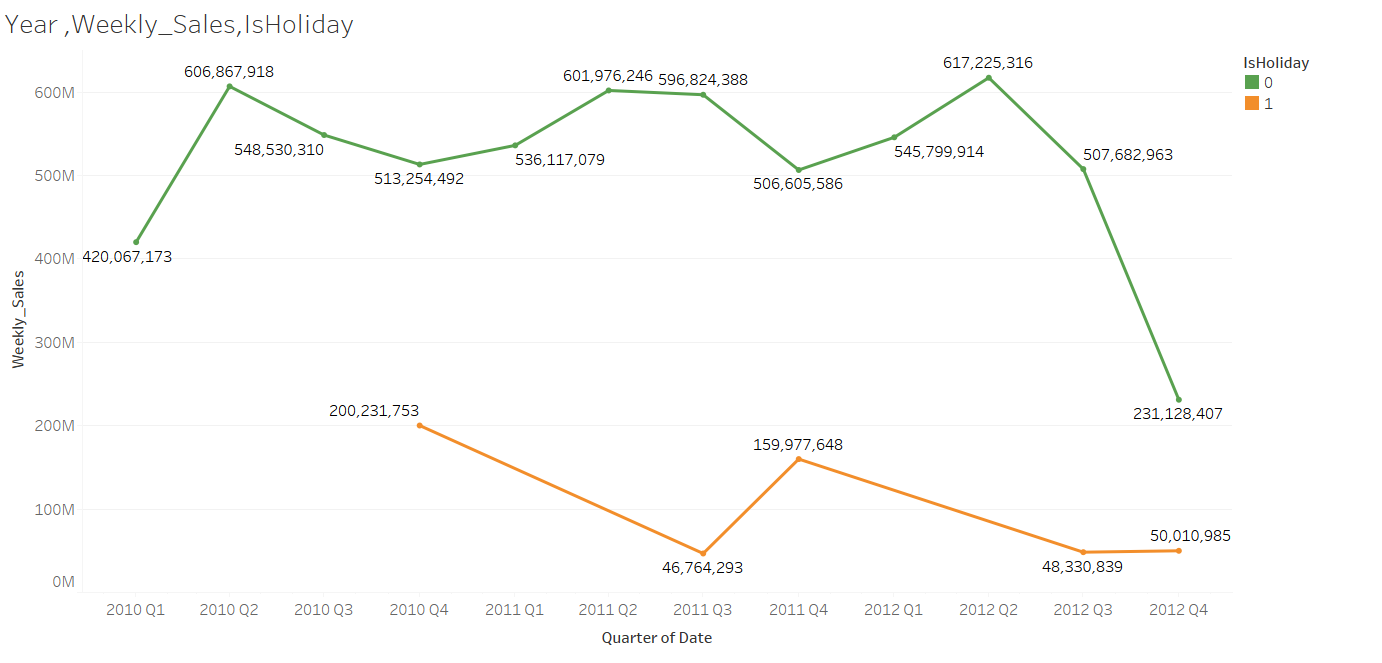

In [51]:
Image(filename='Year ,Weekly_Sales,IsHoliday.png')

# Top 5 Store,Dept

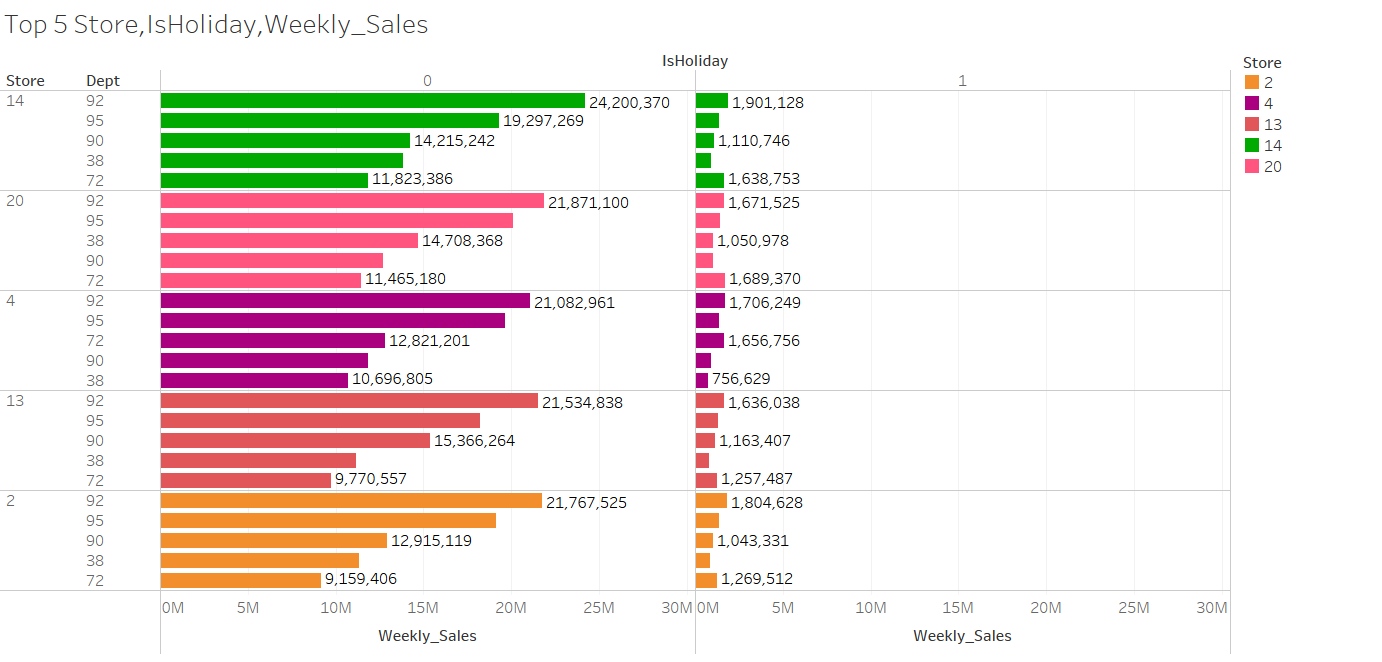

In [52]:
Image(filename='Top 5 Store,IsHoliday,Weekly_Sales.png')

# Bottom 5 Store,Dept

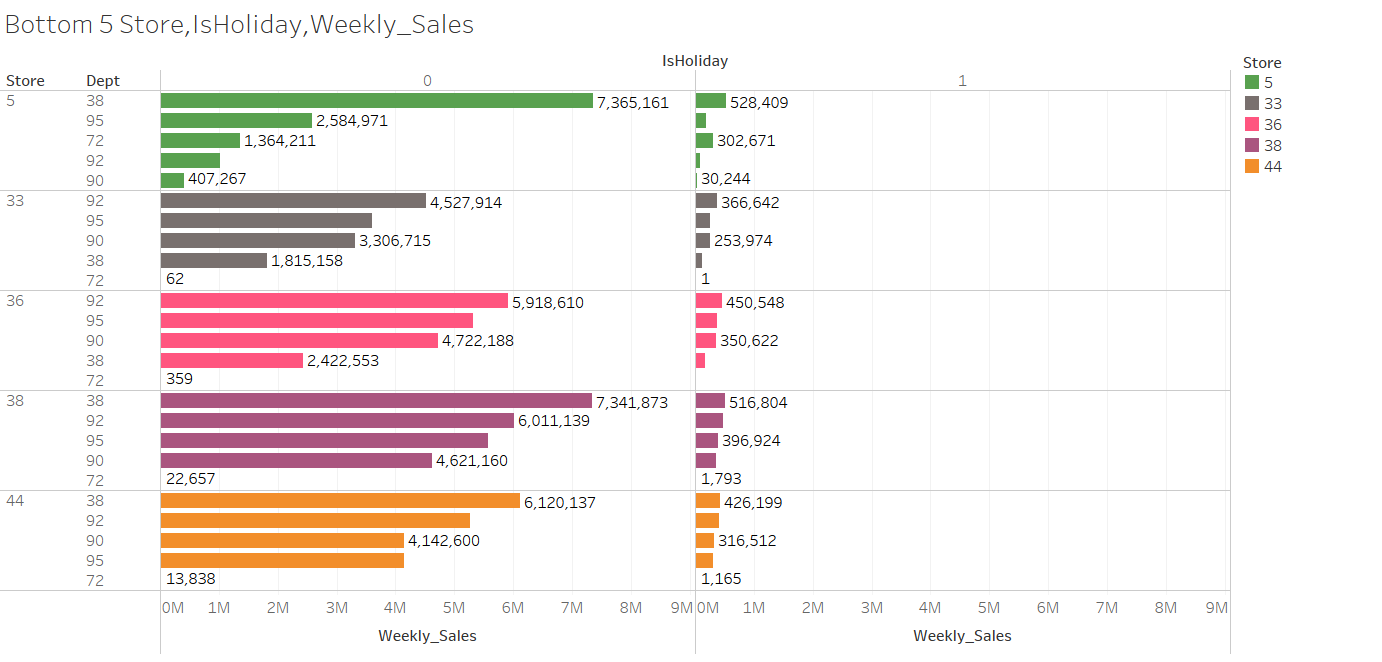

In [53]:
Image(filename='Bottom 5 Store,IsHoliday,Weekly_Sales.png')

In [54]:
import statsmodels.api as sm

In [55]:
x=df.drop(['Date',"Weekly_Sales"],1)
y=df['Weekly_Sales']

In [56]:
x_constant=sm.add_constant(x)
x_constant.head()

C:\Users\yemul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Temperature,Fuel_Price,Unemployment,IsHoliday
0,1.0,1,1,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0
1,1.0,1,2,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0
2,1.0,1,3,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0
3,1.0,1,4,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0
4,1.0,1,5,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0


In [57]:
model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     2873.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:05:28   Log-Likelihood:            -4.8076e+06
No. Observations:              421570   AIC:                         9.615e+06
Df Residuals:                  421555   BIC:                         9.615e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6156.3488    463.632     13.279      0.000    5247.645    7065.053
Store          -93.6499      2.779    -33.693      0.000     -99.098     -88.202
Dept           111.4336      1.096    101.635      0.000     109.285     113.583
Type          1900.6745     87.770     21.655      0.000    1728.648    2072.701
Size             0.1029      0.001    107.797      0.000       0.101       0.105
MarkDown1       -0.0138      0.011     -1.231      0.218      -0.036       0.008
MarkDown2        0.0006      0.007      0.082      0.935      -0.013       0.014
MarkDown3        0.1127      0.006     17.851      0.000       0.100       0.125
MarkDown4        0.0277      0.016      1.725      0.085      -0.004       0.059
MarkDown5        0.0923      0.009     10.328      0.000       0.075       0.110
CPI            -22.3637      0.957    -23.377      0.000     -24.239     -20.489
Temperature     87.1449      6.350     13.724      0.000      74.699      99.591
Fuel_Price    -650.7989     81.456     -7.990      0.000    -810.450    -491.148
Unemployment  -208.8738     19.686    -10.610      0.000    -247.458    -170.290
IsHoliday      695.1949    140.496      4.948      0.000     419.826     970.564
==============================================================================
Omnibus:                   296376.720   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8777287.554
Skew:                           3.022   Prob(JB):                         0.00
Kurtosis:                      24.521   Cond. No.                     2.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
x=df.drop(['Weekly_Sales','Date'],1)
y=df['Weekly_Sales']

In [59]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [60]:
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)

In [61]:
LR.score(x_test,y_test)

0.08651793809348629

In [62]:
LR.score(x_train,y_train)

0.08731028658317208

In [63]:
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

14575.943217183767
472983398.6423168
21748.181501962797


In [64]:
Model=[]
Accuracy_train=[]
Accuracy_test=[]
RMSE=[]
MSE=[]
MAE=[]

In [65]:
Model=['Linear Regression']
Accuracy_train=[LR.score(x_train,y_train)]
Accuracy_test=[LR.score(x_test,y_test)]
RMSE=[np.sqrt(metrics.mean_squared_error(y_test,y_pred))]
MSE=[metrics.mean_squared_error(y_test,y_pred)]
MAE=[metrics.mean_absolute_error(y_test,y_pred)]

# Feature Selection

# VIF

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    thresh = 5
    output= pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    for i in range(1,k):
        print('Iteration no ',i)
        print(vif)
        a = np.argmax(vif)
        print('Max vif is for variable no : ',a)
        if(vif[a]<=thresh):
            break
        if(i==1):
            output = x.drop(x.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
        elif(i>1):
            output = output.drop(output.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
    return(output)     

selected_features = cal_vif(x)
selected_features.head()

Iteration no  1
[4.506062183878648, 3.0758055996929587, 5.04961524849476, 15.917893436448516, 4.771518991694485, 1.1571000164977143, 1.0976347108329048, 3.759097302338094, 1.4561873083854493, 14.475390698248454, 3.60493098601358, 34.67428126118675, 18.138461761306328, 1.2425751433593784]
Max vif is for variable no :  11
Iteration no  2
[4.385204848296714, 3.0438039312995144, 4.4688738294125185, 13.602272634626276, 4.535720416460024, 1.156410952384596, 1.0963439349043076, 3.6963307158463943, 1.4476024767671747, 11.736014021392048, 3.574992205261479, 15.70361990972485, 1.238897364487619]
Max vif is for variable no :  11
Iteration no  3
[4.011635041132327, 3.0121978955374717, 3.451674196960917, 9.891868974657024, 4.533694534046664, 1.155660825558047, 1.0959594893797349, 3.696281222749155, 1.438885575885046, 11.229670883482363, 3.572419853336726, 1.23764384515995]
Max vif is for variable no :  9
Iteration no  4
[4.007952271618233, 2.924250110916076, 2.31088131885725, 4.849041280967638, 4.5

,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Temperature,IsHoliday
0,1,1,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
1,1,2,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
2,1,3,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
3,1,4,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
4,1,5,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0


In [67]:
x.columns

Index(['Store', 'Dept', 'Type', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Temperature', 'Fuel_Price',
       'Unemployment', 'IsHoliday'],
      dtype='object')

In [68]:
x=df.drop(['Fuel_Price','CPI','Unemployment','Date','Weekly_Sales'],1)
x_constant=sm.add_constant(x)

C:\Users\yemul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [69]:
x_constant.head()

,const,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Temperature,IsHoliday
0,1.0,1,1,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
1,1.0,1,2,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
2,1.0,1,3,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
3,1.0,1,4,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
4,1.0,1,5,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0


In [70]:
model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     3600.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:05:59   Log-Likelihood:            -4.8079e+06
No. Observations:              421570   AIC:                         9.616e+06
Df Residuals:                  421558   BIC:                         9.616e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2143.0460    194.784    -11.002      0.000   -2524.817   -1761.275
Store         -87.7696      2.696    -32.551      0.000     -93.054     -82.485
Dept          111.4994      1.097    101.627      0.000     109.349     113.650
Type         1931.2733     86.784     22.254      0.000    1761.179    2101.367
Size            0.1040      0.001    109.753      0.000       0.102       0.106
MarkDown1      -0.0294      0.011     -2.716      0.007      -0.051      -0.008
MarkDown2      -0.0019      0.007     -0.279      0.780      -0.016       0.012
MarkDown3       0.1126      0.006     17.845      0.000       0.100       0.125
MarkDown4       0.0451      0.016      2.837      0.005       0.014       0.076
MarkDown5       0.0765      0.009      8.648      0.000       0.059       0.094
Temperature    45.2952      6.050      7.486      0.000      33.437      57.154
IsHoliday     634.6758    140.220      4.526      0.000     359.850     909.502
==============================================================================
Omnibus:                   296409.887   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8773071.445
Skew:                           3.022   Prob(JB):                         0.00
Kurtosis:                      24.515   Cond. No.                     9.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
x=df.drop(['Fuel_Price','CPI','Unemployment','Date','Weekly_Sales'],1)
y=df['Weekly_Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)

In [72]:
Model.append(' VIF Linear Regression')
Accuracy_train.append(LR.score(x_train,y_train))
Accuracy_test.append(LR.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
MSE.append(metrics.mean_squared_error(y_test,y_pred))
MAE.append(metrics.mean_absolute_error(y_test,y_pred))

In [73]:
Model,Accuracy_train,Accuracy_test,RMSE,MSE,MAE

(['Linear Regression', ' VIF Linear Regression'],
 [0.08731028658317208, 0.08596340329202656],
 [0.08651793809348629, 0.08556213837892024],
 [21748.181501962797, 21759.556367388832],
 [472983398.6423168, 473478293.3055719],
 [14575.943217183767, 14585.995829346552])

# BACKWARD Elimination

In [74]:
cols=list(x.columns)
pmax=1
while (len(cols)>0):
    p=[]
    x_1=x[cols]
    x_1=sm.add_constant(x_1)
    model=sm.OLS(y,x_1).fit()
    p=pd.Series(model.pvalues.values[1:],index=cols)
    pmax=max(p)
    features_with_p_max=p.idxmax() 
    if(pmax>0.05):
        cols.remove(features_with_p_max)
    else:
        break
selected_features=cols
print(selected_features)

C:\Users\yemul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['Store', 'Dept', 'Type', 'Size', 'MarkDown1', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Temperature', 'IsHoliday']


In [75]:
x_constant=sm.add_constant(x)
model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     3600.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:06:02   Log-Likelihood:            -4.8079e+06
No. Observations:              421570   AIC:                         9.616e+06
Df Residuals:                  421558   BIC:                         9.616e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2143.0460    194.784    -11.002      0.000   -2524.817   -1761.275
Store         -87.7696      2.696    -32.551      0.000     -93.054     -82.485
Dept          111.4994      1.097    101.627      0.000     109.349     113.650
Type         1931.2733     86.784     22.254      0.000    1761.179    2101.367
Size            0.1040      0.001    109.753      0.000       0.102       0.106
MarkDown1      -0.0294      0.011     -2.716      0.007      -0.051      -0.008
MarkDown2      -0.0019      0.007     -0.279      0.780      -0.016       0.012
MarkDown3       0.1126      0.006     17.845      0.000       0.100       0.125
MarkDown4       0.0451      0.016      2.837      0.005       0.014       0.076
MarkDown5       0.0765      0.009      8.648      0.000       0.059       0.094
Temperature    45.2952      6.050      7.486      0.000      33.437      57.154
IsHoliday     634.6758    140.220      4.526      0.000     359.850     909.502
==============================================================================
Omnibus:                   296409.887   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8773071.445
Skew:                           3.022   Prob(JB):                         0.00
Kurtosis:                      24.515   Cond. No.                     9.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
x=df.drop(['Fuel_Price','CPI','Unemployment','Date','Weekly_Sales'],1)
y=df['Weekly_Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)

In [77]:
Model.append('Backward Linear Regression')
Accuracy_train.append(LR.score(x_train,y_train))
Accuracy_test.append(LR.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
MSE.append(metrics.mean_squared_error(y_test,y_pred))
MAE.append(metrics.mean_absolute_error(y_test,y_pred))

In [78]:
Model,Accuracy_train,Accuracy_test,RMSE,MSE,MAE

(['Linear Regression', ' VIF Linear Regression', 'Backward Linear Regression'],
 [0.08731028658317208, 0.08596340329202656, 0.08596340329202656],
 [0.08651793809348629, 0.08556213837892024, 0.08556213837892024],
 [21748.181501962797, 21759.556367388832, 21759.556367388832],
 [472983398.6423168, 473478293.3055719, 473478293.3055719],
 [14575.943217183767, 14585.995829346552, 14585.995829346552])

# RFE

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [80]:
nof_list=np.arange(1,10)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.085574


In [81]:
cols = list(x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 9)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Store', 'Dept', 'Type', 'Size', 'MarkDown3', 'MarkDown4', 'MarkDown5',
       'Temperature', 'IsHoliday'],
      dtype='object')


In [82]:
x=df[['Store', 'Dept', 'Type', 'MarkDown3', 'CPI', 'Temperature',
       'Fuel_Price', 'Unemployment', 'IsHoliday']]
y=df['Weekly_Sales']

In [83]:
x_constant=sm.add_constant(x)
model=sm.OLS(y,x_constant).fit()
model.summary()

C:\Users\yemul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     3030.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:06:13   Log-Likelihood:            -4.8136e+06
No. Observations:              421570   AIC:                         9.627e+06
Df Residuals:                  421560   BIC:                         9.627e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.257e+04    430.395     52.448      0.000    2.17e+04    2.34e+04
Store         -102.0009      2.811    -36.284      0.000    -107.511     -96.491
Dept           111.4448      1.112    100.211      0.000     109.265     113.625
Type         -5862.1317     52.598   -111.452      0.000   -5965.222   -5759.041
MarkDown3        0.1311      0.006     20.570      0.000       0.119       0.144
CPI            -27.3397      0.964    -28.369      0.000     -29.229     -25.451
Temperature     53.9195      6.343      8.501      0.000      41.487      66.352
Fuel_Price     -87.6627     77.029     -1.138      0.255    -238.638      63.313
Unemployment   -54.4523     19.845     -2.744      0.006     -93.347     -15.558
IsHoliday      523.2404    139.434      3.753      0.000     249.953     796.527
==============================================================================
Omnibus:                   297046.044   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8387671.529
Skew:                           3.050   Prob(JB):                         0.00
Kurtosis:                      23.983   Cond. No.                     7.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
x=df[['Store', 'Dept', 'Type', 'MarkDown3', 'CPI', 'Temperature','Fuel_Price', 'Unemployment', 'IsHoliday']]
y=df['Weekly_Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)

In [85]:
Model.append('RFE Linear Regression')
Accuracy_train.append(LR.score(x_train,y_train))
Accuracy_test.append(LR.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
MSE.append(metrics.mean_squared_error(y_test,y_pred))
MAE.append(metrics.mean_absolute_error(y_test,y_pred))

In [86]:
Model,Accuracy_train,Accuracy_test,RMSE,MSE,MAE

(['Linear Regression',
  ' VIF Linear Regression',
  'Backward Linear Regression',
  'RFE Linear Regression'],
 [0.08731028658317208,
  0.08596340329202656,
  0.08596340329202656,
  0.060977021050784286],
 [0.08651793809348629,
  0.08556213837892024,
  0.08556213837892024,
  0.06018877259861344],
 [21748.181501962797,
  21759.556367388832,
  21759.556367388832,
  22059.37743632307],
 [472983398.6423168, 473478293.3055719, 473478293.3055719, 486616132.8781594],
 [14575.943217183767,
  14585.995829346552,
  14585.995829346552,
  14834.97196314139])

# Step Forward Selection

In [87]:
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [88]:
LR = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)


# Build step forward feature selection
sfs1 = sfs(LR,k_features = 5,forward=True,floating=False, scoring='r2',verbose=2,cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.6s finished

[2019-11-28 23:06:16] Features: 1/5 -- score: 0.03306518645356136[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.9s finished

[2019-11-28 23:06:19] Features: 2/5 -- score: 0.05537136151298747[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.9s finished

[2019-11-28 23:06:22] Features: 3/5 -- score: 0.05780477327811693[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [89]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4]


In [90]:
x.columns

Index(['Store', 'Dept', 'Type', 'MarkDown3', 'CPI', 'Temperature',
       'Fuel_Price', 'Unemployment', 'IsHoliday'],
      dtype='object')

In [91]:
x=df.drop(['Date','MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5','Temperature', 'Fuel_Price',
       'Unemployment', 'IsHoliday','Weekly_Sales'],1)
y=df['Weekly_Sales']

In [92]:
x_constant=sm.add_constant(x)
model=sm.OLS(y,x_constant).fit()
model.summary()

C:\Users\yemul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     7870.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:06:29   Log-Likelihood:            -4.8080e+06
No. Observations:              421570   AIC:                         9.616e+06
Df Residuals:                  421564   BIC:                         9.616e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        804.3003    261.202      3.079      0.002     292.352    1316.249
Store        -99.2058      2.744    -36.156      0.000    -104.584     -93.828
Dept         111.5716      1.097    101.669      0.000     109.421     113.722
Type        1791.8364     87.096     20.573      0.000    1621.132    1962.541
Size           0.1030      0.001    109.185      0.000       0.101       0.105
CPI          -15.7845      0.878    -17.969      0.000     -17.506     -14.063
==============================================================================
Omnibus:                   298340.155   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9097783.931
Skew:                           3.041   Prob(JB):                         0.00
Kurtosis:                      24.930   Cond. No.                     1.20e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
x=df.drop(['Date','MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 'MarkDown5','Temperature', 'Fuel_Price',
       'Unemployment', 'IsHoliday','Weekly_Sales'],1)
y=df['Weekly_Sales']

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)

In [95]:
Model.append('Step Forward Selection Linear Regression')
Accuracy_train.append(LR.score(x_train,y_train))
Accuracy_test.append(LR.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
MSE.append(metrics.mean_squared_error(y_test,y_pred))
MAE.append(metrics.mean_absolute_error(y_test,y_pred))

In [96]:
Model,Accuracy_train,Accuracy_test,RMSE,MSE,MAE

(['Linear Regression',
  ' VIF Linear Regression',
  'Backward Linear Regression',
  'RFE Linear Regression',
  'Step Forward Selection Linear Regression'],
 [0.08731028658317208,
  0.08596340329202656,
  0.08596340329202656,
  0.060977021050784286,
  0.0856572397297638],
 [0.08651793809348629,
  0.08556213837892024,
  0.08556213837892024,
  0.06018877259861344,
  0.0846813103903622],
 [21748.181501962797,
  21759.556367388832,
  21759.556367388832,
  22059.37743632307,
  21770.033740319363],
 [472983398.6423168,
  473478293.3055719,
  473478293.3055719,
  486616132.8781594,
  473934369.0546435],
 [14575.943217183767,
  14585.995829346552,
  14585.995829346552,
  14834.97196314139,
  14587.771944755268])

# Embedded Method

In [97]:
x=df.drop(['Date',"Weekly_Sales"],1)
y=df['Weekly_Sales']

In [98]:
from sklearn.linear_model import  LassoCV
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

C:\Users\yemul\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 446404.847387
Best score using built-in LassoCV: 0.060492


In [99]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Lasso picked 4 variables and eliminated the other 10 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

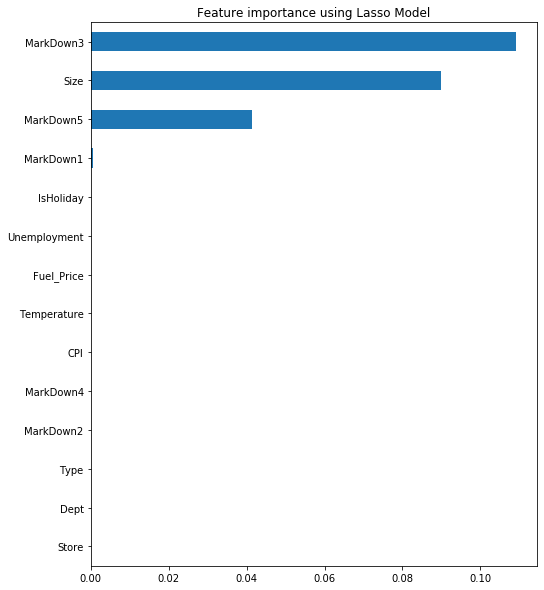

In [100]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [101]:
x=df[['MarkDown1','MarkDown3','MarkDown5']]
y=df['Weekly_Sales']
x_constant=sm.add_constant(x)

C:\Users\yemul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [102]:
model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     675.4
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:06:37   Log-Likelihood:            -4.8258e+06
No. Observations:              421570   AIC:                         9.652e+06
Df Residuals:                  421566   BIC:                         9.652e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.527e+04     38.958    392.020      0.000    1.52e+04    1.53e+04
MarkDown1      0.1243      0.006     19.610      0.000       0.112       0.137
MarkDown3      0.1542      0.006     24.400      0.000       0.142       0.167
MarkDown5      0.1895      0.009     20.764      0.000       0.172       0.207
==============================================================================
Omnibus:                   308430.966   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8558297.485
Skew:                           3.238   Prob(JB):                         0.00
Kurtosis:                      24.102   Cond. No.                     7.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observation:- firstly We build Model without Feature selection and then with Feature Selection but both case accuracy is very very less ,means model is not linear

In [103]:
x=df[['MarkDown1','MarkDown3','MarkDown5']]
y=df['Weekly_Sales']

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)

In [105]:
Model.append(' LassoCV Linear Regression')
Accuracy_train.append(LR.score(x_train,y_train))
Accuracy_test.append(LR.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
MSE.append(metrics.mean_squared_error(y_test,y_pred))
MAE.append(metrics.mean_absolute_error(y_test,y_pred))

In [106]:
Model,Accuracy_train,Accuracy_test,RMSE,MSE,MAE

(['Linear Regression',
  ' VIF Linear Regression',
  'Backward Linear Regression',
  'RFE Linear Regression',
  'Step Forward Selection Linear Regression',
  ' LassoCV Linear Regression'],
 [0.08731028658317208,
  0.08596340329202656,
  0.08596340329202656,
  0.060977021050784286,
  0.0856572397297638,
  0.0047205216946042405],
 [0.08651793809348629,
  0.08556213837892024,
  0.08556213837892024,
  0.06018877259861344,
  0.0846813103903622,
  0.0048910794769233545],
 [21748.181501962797,
  21759.556367388832,
  21759.556367388832,
  22059.37743632307,
  21770.033740319363,
  22699.079544592696],
 [472983398.6423168,
  473478293.3055719,
  473478293.3055719,
  486616132.8781594,
  473934369.0546435,
  515248212.17174655],
 [14575.943217183767,
  14585.995829346552,
  14585.995829346552,
  14834.97196314139,
  14587.771944755268,
  15129.961739770999])

In [107]:
final_result = pd.DataFrame({'Model':Model,'Accuracy_train':Accuracy_train,'Accuracy_test':Accuracy_test,'RMSE':RMSE,'MSE':MSE,'MAE':MAE})
final_result

,Model,Accuracy_train,Accuracy_test,RMSE,MSE,MAE
0,Linear Regression,0.087310,0.086518,21748.181502,4.729834e+08,14575.943217
1,VIF Linear Regression,0.085963,0.085562,21759.556367,4.734783e+08,14585.995829
2,Backward Linear Regression,0.085963,0.085562,21759.556367,4.734783e+08,14585.995829
3,RFE Linear Regression,0.060977,0.060189,22059.377436,4.866161e+08,14834.971963
4,Step Forward Selection Linear Regression,0.085657,0.084681,21770.033740,4.739344e+08,14587.771945
5,LassoCV Linear Regression,0.004721,0.004891,22699.079545,5.152482e+08,15129.961740


# Move Toward Non Linear Model

In [108]:
df.head()

,Date,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales
0,2010-05-02,1,1,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,24924.50
1,2010-05-02,1,2,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,50605.27
2,2010-05-02,1,3,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,13740.12
3,2010-05-02,1,4,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,39954.04
4,2010-05-02,1,5,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,32229.38


# Decision Tree

In [200]:
x=df.drop(['Weekly_Sales','Date'],1)
y=df['Weekly_Sales']

In [201]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [202]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [203]:
tree.score(x_test,y_test)

0.9113332965168507

In [204]:
tree.score(x_train,y_train)

1.0

In [205]:
y_pred=tree.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

2409.2996814289436
45909909.4648259
6775.685165710247


In [206]:
Model=[]
Accuracy=[]
RMSE=[]

In [207]:
Model.append('Decision Tree')
Accuracy.append(tree.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# Gridsearch

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
parms ={'max_depth':[1,2,3,4,5]}

In [119]:
grid_search=GridSearchCV(DecisionTreeRegressor(),param_grid=parms,n_jobs=-1,verbose=0)
grid_search.fit(x_train,y_train)

C:\Users\yemul\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1, param_grid={'max_depth': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [120]:
grid_search.best_params_

{'max_depth': 5}

In [121]:
tree=DecisionTreeRegressor(max_depth = 5)
tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [122]:
tree.score(x_test,y_test)

0.5427011338786959

In [123]:
tree.score(x_train,y_train)

0.5400793035202583

In [124]:
y_pred=tree.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

9503.156357777543
236780535.61545247
15387.674795610039


# Random Forest

In [125]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

C:\Users\yemul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [126]:
RF.score(x_test,y_test)

0.9453129400901932

In [127]:
RF.score(x_train,y_train)

0.9900756584304606

In [128]:
y_pred=RF.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

1960.1042890781284
28315905.190203484
5321.269133412017


In [129]:
Model.append('RandomForest Tree')
Accuracy.append(RF.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [130]:
Model,Accuracy,RMSE

(['Decision Tree', 'RandomForest Tree'],
 [0.9129377655978579, 0.9453129400901932],
 [6714.100558581091, 5321.269133412017])

Gridsearch

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
parms = {'max_depth': [2, 3, 4],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None]}

In [133]:
grid_search=GridSearchCV(RandomForestRegressor(),param_grid=parms,n_jobs=-1,verbose=0)

In [134]:
grid_search.fit(x_train,y_train)

C:\Users\yemul\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\yemul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False], 

In [135]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 4, 'max_features': None}

In [136]:
RF=RandomForestRegressor(bootstrap= True,max_depth= 4,max_features= None)
RF.fit(x_train,y_train)

C:\Users\yemul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [137]:
RF.score(x_test,y_test)

0.4525060013293759

In [138]:
RF.score(x_train,y_train)

0.4464260819121859

In [139]:
y_pred=RF.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

10454.29444827613
283481836.1808242
16836.918844634973


# Ensemble Techniques

# Bagging

In [140]:
from sklearn.ensemble import BaggingRegressor

In [141]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [142]:
DT_bag=DecisionTreeRegressor(max_depth=10,min_samples_leaf=10,min_samples_split=60)

In [143]:
DT_bag.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=60, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [144]:
DT_bag.score(x_test,y_test)

0.8598190011208037

In [145]:
DT_bag.score(x_train,y_train)

0.861603045541637

In [146]:
y_pred=DT_bag.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

4393.846169657787
72583018.36445105
8519.566794412205


In [147]:
Model.append('DT_bag Tree')
Accuracy.append(DT_bag.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# Boosting

In [148]:
from sklearn.ensemble import AdaBoostRegressor
dt_Boost = AdaBoostRegressor(base_estimator=tree,n_estimators=10,learning_rate=0.01,random_state=1)
dt_Boost.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=5,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.01, loss='linear', n_estimators=10,
                  random_

In [149]:
dt_Boost.score(x_test,y_test)

0.5432757508880157

In [150]:
dt_Boost.score(x_train,y_train)

0.5407005933472047

In [151]:
y_pred=dt_Boost.predict(x_test)

In [152]:
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

9509.126079304746
236483010.00732112
15378.0040969991


In [153]:
Model.append('DT_Boost')
Accuracy.append(dt_Boost.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Random Forest

In [154]:
RF_Boost = AdaBoostRegressor(base_estimator=RF,n_estimators=10,learning_rate=0.01,random_state=1)
RF_Boost.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=10,
                                                       n_jobs=None,
                                                       oob_score=False,
                             

In [155]:
RF_Boost.score(x_test,y_test)

0.45225900002519215

In [156]:
RF_Boost.score(x_train,y_train)

0.44591062396617176

In [157]:
y_pred=RF_Boost.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

10458.374253166274
283609728.69365376
16840.71639490594


In [158]:
Model.append('RF_Boost')
Accuracy.append(RF_Boost.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# GradientBoostingRegressor

In [159]:
from sklearn.ensemble import GradientBoostingRegressor
Gradient_boost = GradientBoostingRegressor(n_estimators=10,learning_rate=0.01,random_state=1)
Gradient_boost.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [160]:
y_pred=Gradient_boost.predict(x_test)

In [161]:
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

14611.07995108854
482237428.8485569
21959.905028222616


In [162]:

Model.append('Gradient_Boosting')
Accuracy.append(Gradient_boost.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# XGBRegressor

In [169]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train, verbose=False)

C:\Users\yemul\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:13:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [170]:
y_pred=xgbr.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

6832.676152300013
132448353.21035476
11508.620821382325


In [171]:
Model.append('XGBR')
Accuracy.append(xgbr.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [172]:
Model,Accuracy,RMSE

(['Decision Tree',
  'RandomForest Tree',
  'DT_bag Tree',
  'DT_Boost',
  'RF_Boost',
  'Gradient_Boosting',
  'XGBR'],
 [0.9129377655978579,
  0.9453129400901932,
  0.8598190011208037,
  0.5432757508880157,
  0.45225900002519215,
  0.06864544908434456,
  0.7441999124408751],
 [6714.100558581091,
  5321.269133412017,
  8519.566794412205,
  15378.0040969991,
  16840.71639490594,
  21959.905028222616,
  11508.620821382325])

In [173]:
final_result = pd.DataFrame({'Model':Model,'Accuracy':Accuracy,'RMSE':RMSE})
final_result

,Model,Accuracy,RMSE
0,Decision Tree,0.912938,6714.100559
1,RandomForest Tree,0.945313,5321.269133
2,DT_bag Tree,0.859819,8519.566794
3,DT_Boost,0.543276,15378.004097
4,RF_Boost,0.452259,16840.716395
5,Gradient_Boosting,0.068645,21959.905028
6,XGBR,0.744200,11508.620821


# Observation:-  DT_bag is good compared to all model

In [174]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [175]:
get_score(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

0.9113561122492118

In [176]:
get_score(RandomForestRegressor(),x_train,x_test,y_train,y_test)

C:\Users\yemul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9462169161110369